In [77]:
#!pip install pandas_datareader

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [25]:
# Get the stock quote

df = web.DataReader("PYPL", data_source="yahoo", start="2012-01-01", end="2021-11-25")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-07-06,39.750000,36.000000,38.000000,36.709999,5866600,36.709999
2015-07-07,37.810001,36.000000,37.720001,36.619999,7359000,36.619999
2015-07-08,36.360001,34.529999,36.340000,34.700001,5387700,34.700001
2015-07-09,35.520000,33.990002,35.099998,34.500000,3760100,34.500000
2015-07-10,35.189999,33.980000,34.660000,34.689999,4472800,34.689999
...,...,...,...,...,...,...
2021-11-18,207.500000,199.199997,206.990005,200.500000,19980100,200.500000
2021-11-19,202.500000,193.070007,202.190002,193.610001,24576400,193.610001
2021-11-22,193.899994,184.274994,193.619995,189.479996,29956600,189.479996


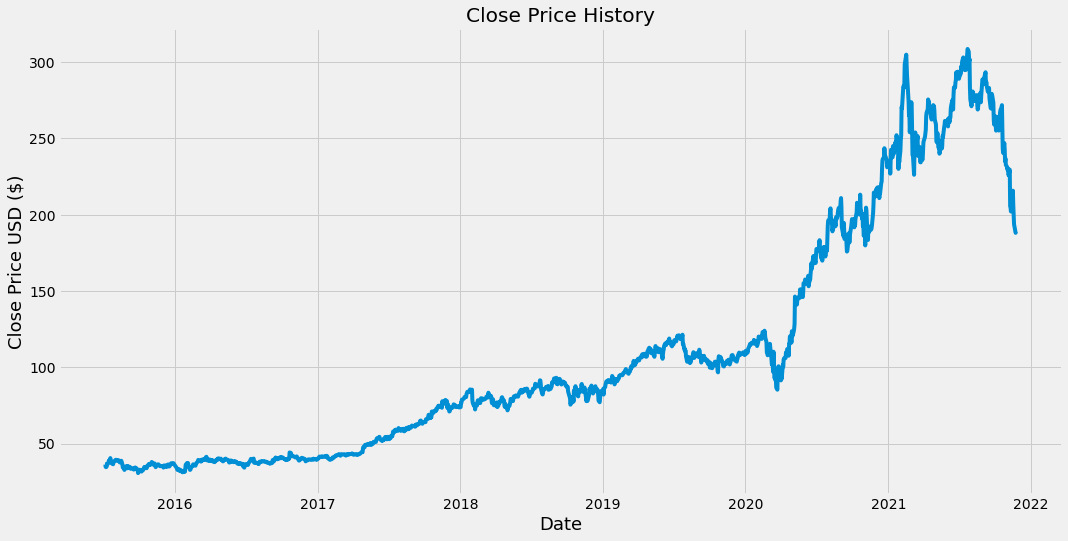

In [26]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the Close column
data = df.filter(["Close"])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1290

In [28]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02187837],
       [0.02155452],
       [0.01464556],
       ...,
       [0.57160848],
       [0.56646277],
       [0.56883774]])

In [29]:
# Create the training data set
train_data = scaled_data[:, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [30]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data (the model needs a 3D object)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1552, 60, 1)

In [31]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [32]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [33]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1552/1552 [==============================] - 66s 39ms/step - loss: 0.0021


In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [12]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [13]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [14]:
# Get the models predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [15]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

427.1063901282084

<ipython-input-16-0395726749b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


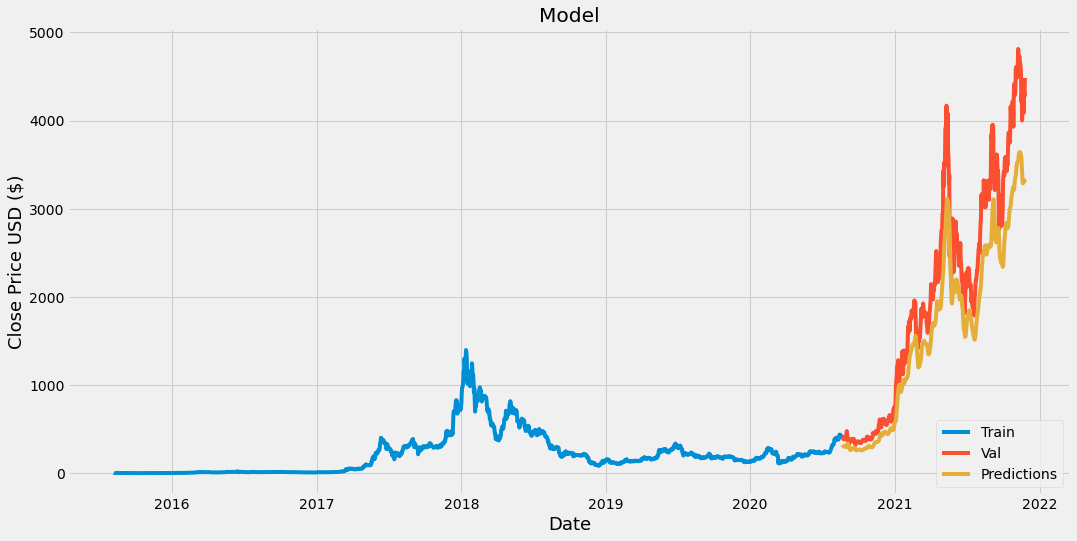

In [16]:
# Plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc="lower right")
plt.show()

In [94]:
y_test

array([[194.57000732],
       [192.44000244],
       [198.17999268],
       [196.78999329],
       [198.88000488],
       [201.66999817],
       [203.47999573],
       [204.33999634],
       [204.47999573],
       [204.13999939],
       [208.92999268],
       [210.82000732],
       [204.99000549],
       [191.83999634],
       [185.94999695],
       [194.6000061 ],
       [190.08999634],
       [184.        ],
       [186.96000671],
       [186.02000427],
       [180.91000366],
       [175.78999329],
       [176.07000732],
       [183.21000671],
       [187.77999878],
       [181.61000061],
       [182.19000244],
       [187.25      ],
       [192.02000427],
       [194.5       ],
       [197.02999878],
       [196.94000244],
       [191.91000366],
       [196.8500061 ],
       [191.66000366],
       [194.61000061],
       [193.05999756],
       [197.27000427],
       [201.50999451],
       [207.74000549],
       [203.6000061 ],
       [203.13999939],
       [204.44999695],
       [200

In [35]:
# Get the quote
scco_quote = web.DataReader("PYPL", data_source="yahoo", start="2012-01-01", end="2021-11-25")
# Create new dataframe
new_df = scco_quote.filter(["Close"])
# Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
# Get the predicted price
pred_price = scaler.inverse_transform(model.predict(X_test))
print(pred_price)

[[204.66681]]


In [18]:
predictions

array([[ 321.44446],
       [ 314.84317],
       [ 308.989  ],
       [ 303.9672 ],
       [ 302.97986],
       [ 300.33194],
       [ 297.8437 ],
       [ 295.32565],
       [ 295.35614],
       [ 297.19778],
       [ 303.97318],
       [ 312.76675],
       [ 327.3573 ],
       [ 335.97382],
       [ 331.56793],
       [ 322.31802],
       [ 304.29056],
       [ 288.51465],
       [ 276.76093],
       [ 266.8624 ],
       [ 261.89932],
       [ 262.88284],
       [ 267.50064],
       [ 274.86377],
       [ 278.6728 ],
       [ 281.8485 ],
       [ 282.0978 ],
       [ 281.01453],
       [ 283.08093],
       [ 285.44785],
       [ 287.653  ],
       [ 287.06848],
       [ 280.7101 ],
       [ 273.303  ],
       [ 263.11154],
       [ 258.08527],
       [ 256.90103],
       [ 258.20352],
       [ 260.79605],
       [ 263.11707],
       [ 265.62582],
       [ 267.71918],
       [ 268.12357],
       [ 266.58405],
       [ 264.52792],
       [ 263.51083],
       [ 263.3448 ],
       [ 261.